# Plot of complex model solutions

This notebook plots the solution figure for a specific solution from the set of results of the multiple inversion notebook for the data produced by the complex model.

In [1]:
import matplotlib as mpb

# show the figures in windows

# show all the matplotlib backends 
#mpb.rcsetup.all_backends 

# force matplotlib to use the 'Qt5Agg' backend 
#mpb.use(arg='Qt5Agg', force=True)

In [2]:
import cPickle as pickle
import matplotlib.pyplot as plt
# importing my functions
import sys
sys.path.insert(0, '../../code')

import mag_polyprism_functions as mfun

/home/leonardo/anaconda2/lib/python2.7/site-packages/fatiando/vis/mpl.py:76: UserWarning: This module will be removed in v0.6. We recommend the use of matplotlib.pyplot module directly. Some of the fatiando specific functions will remain.
  "specific functions will remain.")


In [3]:
# importing the pickle file of results
result_path = 'l2-tfa-inversion/multiple-54476/'

with open(result_path+'inversion.pickle') as w:
        inversion = pickle.load(w)

# importing the true model
with open('model.pickle') as w:
        model = pickle.load(w)

In [4]:
inversion['regularization']

array([1.e-05, 1.e-04, 0.e+00, 0.e+00, 1.e-04, 1.e-07, 1.e-06])

In [5]:
inversion['results'][21][0][-1]*10 +150

5904.447170619288

In [6]:
v = 0.
for i in inversion['results'][21][2][-1]:
    v += mfun.volume_polygon([i])
print v*1e-9

11.187365733606004


In [7]:
# directory to save the figures and filename
filename = '../../manuscript/figures/complex_results.png'
#filename = ''

# Results

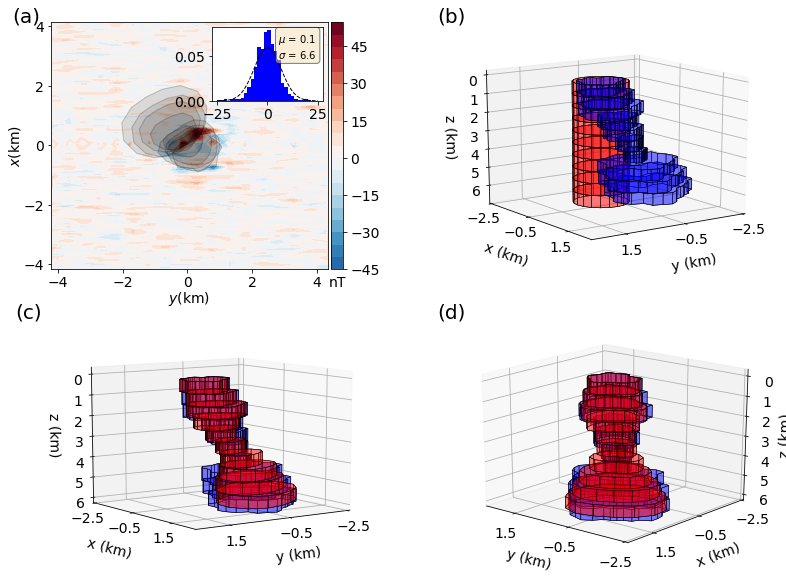

In [8]:
mfun.plot_solution(inversion['x'], inversion['y'],
                            inversion['z'], inversion['results'][21][3],
                            inversion['results'][21][2][-1],
                            inversion['results'][21][2][0], (13, 10), 300,
                            (0.6, 0.95), [15, 55, 10, 55, 20, 130], [-2.5,2.5,-2.5,2.5],
                            model['prisms'], filename)

Application to complex model data. (a) residual data given by the difference between the noise-corrupted data and the predicted data (not shown) produced by the estimated model. The inset in (a) shows the histogram of the residuals and the Gaussian curve (dashed line) whose mean and standard deviation are, respectively, $\mu = 0.09$ nT and $\sigma=6.66$ nT. (b) perspective view of the initial approximate (red prisms) and the true model (blue prisms). (c) and (d) comparison between the estimated source (red prisms) and the true model (blue prisms) in perspective views.

[0.0, 0.027300925663424423, 0.07603357862023213, 0.19733274740667567, 0.2428941448381825, 0.24361095566777552, 0.24372061479893758, 0.2467746275761918, 0.24537564321009003, 0.2458086450054329, 0.24570468987874416, 0.24562264600440384]
[0.0, 0.6487065078945347, 0.9836487932944499, 2.092114231233809, 2.787975239396016, 3.0825470114385194, 3.4604159552742475, 3.876216941948793, 3.9529609439225126, 4.059195030973687, 4.154113763229618, 4.245786012749395]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.13308634132883335, 0.43925007717892256, 1.1049204455420722, 0.8815145013135327, 0.8088596200504531, 0.7513778324365163, 0.715904068325603, 0.7150083782593579, 0.7022419129195127, 0.685451596748409, 0.6695391849871151]
[0.16987841856462654, 0.1544375172449835, 0.15386647729435082, 0.15837122274023896, 0.16101334167220588, 0.16089071106806546, 0.16396437425759874, 0.16653547367593208, 0.16679448492955667, 0.167489

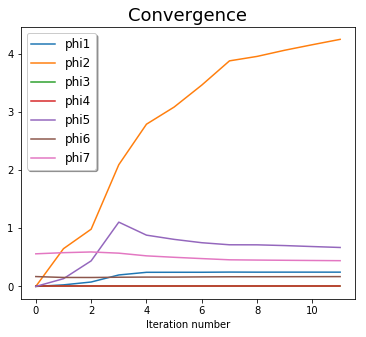

In [9]:
plt.figure(figsize=(6,5))
plt.title('Convergence', fontsize = 18)
plt.xlabel('Iteration number')
legend = ['misfit', 'phi1', 'phi2', 'phi3', 'phi4', 'phi5', 'phi6', 'phi7']
for f, l in zip(inversion['results'][21][1][1:], legend[1:]):
    print f
    plt.plot(f, '-', label=l)
#plt.plot(inversion['results'][35][1][0], 'b-', label='objective function')
plt.legend(loc=0, fontsize=12, shadow=bool, framealpha=1)

plt.savefig('complex-constraints.png', dpi=300, bbox_inches="tight")
#plt.savefig('complex-convergence.png', dpi=300, bbox_inches="tight")
plt.show()

#img(filename=mypath+'complex_tfa_convergence.png', width=400, height=400)

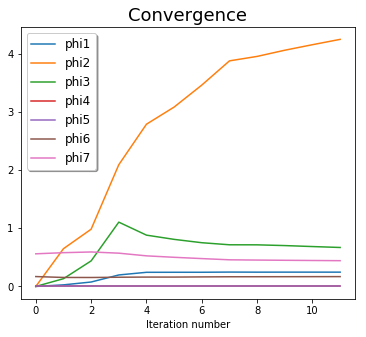

In [10]:
plt.figure(figsize=(6,5))
plt.title('Convergence', fontsize = 18)
plt.xlabel('Iteration number')
legend = ['misfit', 'phi1', 'phi2', 'phi3', 'phi4', 'phi5', 'phi6', 'phi7']
f = inversion['results'][21][1][1:]
plt.plot(f[0], '-', label=legend[1])
plt.plot(f[1], '-', label=legend[2])
plt.plot(f[4], '-', label=legend[3])
plt.plot(f[2], '-', label=legend[4])
plt.plot(f[3], '-', label=legend[5])
plt.plot(f[5], '-', label=legend[6])
plt.plot(f[6], '-', label=legend[7])
#plt.plot(inversion['results'][9][1][0], 'b-', label='objective function')
plt.legend(loc=0, fontsize=12, shadow=bool, framealpha=1)

plt.savefig('simple-constraints.png', dpi=300, bbox_inches="tight")
plt.show()

#img(filename=mypath+'complex_tfa_convergence.png', width=400, height=400)

In [11]:
phi = inversion['results'][14][1][0]
dphi = []
for i in range(len(phi)-1):
    dphi.append(abs(phi[i+1]-phi[i])/phi[i])
    print i, phi[i+1], phi[i], dphi[i]

0 11497.06464981498 24912.6287878112 0.5385045573576701
1 2834.6883793726856 11497.06464981498 0.7534424250264347
2 747.2156494649446 2834.6883793726856 0.7364028953227294
3 149.87623418849398 747.2156494649446 0.7994203757699465
4 69.5912488611151 149.87623418849398 0.53567522404124
5 53.07134170767371 69.5912488611151 0.2373848353607012
6 48.15949753483325 53.07134170767371 0.09255172405279977
7 42.34317915664269 48.15949753483325 0.12077199048814158
8 42.14987552579997 42.34317915664269 0.004565165740806109
9 42.14987552579997 42.14987552579997 0.0
10 42.14987552579997 42.14987552579997 0.0
11 42.14987552579997 42.14987552579997 0.0
12 42.14987552579997 42.14987552579997 0.0
13 42.14987552579997 42.14987552579997 0.0
14 42.14987552579997 42.14987552579997 0.0
15 42.14987552579997 42.14987552579997 0.0
16 42.14987552579997 42.14987552579997 0.0
17 42.14987552579997 42.14987552579997 0.0
18 42.14987552579997 42.14987552579997 0.0
19 42.14987552579997 42.14987552579997 0.0
20 42.149875

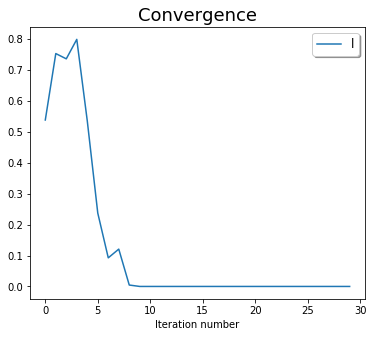

In [12]:
plt.figure(figsize=(6,5))
plt.title('Convergence', fontsize = 18)
plt.xlabel('Iteration number')
plt.plot(dphi, '-', label='l')
#plt.plot(inversion['objective'], 'b-', label='Misfit value')
plt.legend(loc=0, fontsize=12, shadow=bool, framealpha=1)

#plt.savefig(mypath+'complex_tfa_convergence.png', dpi=300, bbox_inches="tight")
plt.show()

#img(filename=mypath+'complex_tfa_convergence.png', width=400, height=400)

In [13]:
inversion['regularization']

array([1.e-05, 1.e-04, 0.e+00, 0.e+00, 1.e-04, 1.e-07, 1.e-06])